In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import export_graphviz
from xgboost import XGBClassifier
from sklearn.cluster import KMeans
from IPython.core.display import display, HTML
from IPython import get_ipython as get_ipython
display(HTML(
    '<style>'
        '#notebook { padding-top:0px !important;margin-left:-30px !important; } ' 
        '.container { width:100% !important; } '
        '.end_space { min-height:0px !important; } '
    '</style>'
))

In [3]:
def reader_prep(name):
    df = pd.read_csv(name)
    df_bal = df[df.is_good==0].iloc[:df.is_good.value_counts().loc[1]]
    df_bal = df_bal.append(df[df.is_good==1])
    X, y = df_bal.drop('is_good', axis=1), df_bal.is_good
    return X, y 

In [4]:
X, y = reader_prep('result.txt')

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [6]:
y.reset_index().is_good.to_frame()

,is_good
0,0
1,0
2,0
3,0
4,0
...,...
141289,1
141290,1
141291,1
141292,1


In [7]:
y.value_counts().to_frame()

,is_good
0,70647
1,70647


# KNN basic

In [8]:
knn = KNeighborsClassifier(n_neighbors=10)

In [74]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [75]:
knn_pred = knn.predict(X_test)
accuracy_score(y_test, knn_pred)

0.8417688942266449

In [9]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 10,
 'p': 2,
 'weights': 'uniform'}

In [10]:
knn_params = {'n_neighbors': range(1,25),
              'weights': ['uniform', 'distance']}

In [11]:
knn_grid = GridSearchCV(knn, 
                       knn_params,
                       cv=10, 
                       n_jobs=-1,
                       verbose=True)

In [13]:
knn_grid.fit(X_train, y_train)

In [139]:
knn_grid.best_params_, knn_grid.best_score_

({'n_neighbors': 18, 'weights': 'distance'}, 0.8502102168103771)

In [140]:
accuracy_score(y_test, knn_grid.predict(X_test))

0.8507549112121472

In [162]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(X20)

In [165]:
kmeans.cluster_centers_

array([[-3.59079506e-03, -1.88476484e-05,  5.18066544e-01,
         5.56170810e-01,  3.48147273e-01, -2.85887740e-01,
         4.56677770e+00,  2.18754875e-01, -1.50596808e+00,
         1.66018284e+00,  7.34164920e-01,  1.47190107e+00,
         6.82139455e-01,  7.69897596e-02,  1.24930089e+00,
         3.94635520e+00],
       [ 3.47901134e-03,  8.07059552e-04,  5.05926559e-01,
         5.43140456e-01,  3.47595730e-01,  3.20425120e-01,
         4.60981577e+00,  2.17334616e-01,  1.49393673e+00,
         1.65866027e+00,  7.42164445e-01, -1.53476348e+00,
         6.87724653e-01,  7.76905921e-02,  1.25616793e+00,
         3.92070019e+00]])

# Trees

In [11]:
clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=7, random_state=17)
clf_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7, random_state=17)

In [143]:
cross_val_score(clf_tree, X_train, y_train, cv=10)

array([0.82708355, 0.82919616, 0.8300412 , 0.82349213, 0.82877363,
       0.82887926, 0.82643144, 0.83319248, 0.82886119, 0.82706529])

In [144]:
clf_tree.predict_proba(X_test)

array([[9.99375975e-01, 6.24024961e-04],
       [7.56000000e-01, 2.44000000e-01],
       [9.99375975e-01, 6.24024961e-04],
       ...,
       [3.66407982e-01, 6.33592018e-01],
       [8.47953216e-01, 1.52046784e-01],
       [7.02010969e-02, 9.29798903e-01]])

In [146]:
clf_tree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 7,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 17,
 'splitter': 'best'}

In [145]:
trr_params = {'max_depth': range(1,30),
              'max_features': range(4,19),
              'min_samples_split': range(2,10), 
              'min_samples_leaf':range(2,10)}

In [16]:
# Инициализируем страифицированную разбивку нашего датасета для валидации
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Инициализируем наш классификатор с дефолтными параметрами
rfc = RandomForestClassifier(n_estimators=20, random_state=42, n_jobs=-1, oob_score=True)

In [14]:
# Обучаем на тренировочном датасете
results = cross_val_score(rfc, X, y, cv=skf)

In [15]:
results

In [17]:
rfc.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 20,
 'n_jobs': -1,
 'oob_score': True,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [155]:
forest_params = {'max_depth': range(1,11),
                'max_features': range(4,19),
                'min_samples_split': range(2,10), 
                'min_samples_leaf':range(2,10)
                'criterion':['gini', 'entropy'],
                }

In [156]:
forest_grid = GridSearchCV(rfc, forest_params,
                                cv=5, n_jobs=-1,
                                verbose=True)

In [18]:
forest_grid.fit(X_train, y_train)

In [19]:
forest_grid.best_params_, forest_grid.best_score_

In [20]:
accuracy_score(y_test, forest_grid.predict(X_test))

In [161]:
for i in range(len(forest_grid.best_estimator_.feature_importances_)):
    print(forest_grid.best_estimator_.feature_importances_[i], df.columns[i])

0.0051874757762436306 px
0.0058041846311643885 py
0.052994194027682864 pz
0.17495193014440616 E
0.3783674851342594 Theta
0.004767713556720854 Phi
0.023535966639669136 E_e
0.07489648710145125 e_theta
0.0054780771550595915 e_phi
0.04704255914436649 E_p
0.18961431413992622 p_theta
0.005577736204728874 p_phi
0.00660773798661861 E_cal_max
0.007761470063277589 E_cal_min
0.009731273486073975 E_cal_sum
0.00768139480835104 Cal_n


In [263]:
rfc = RandomForestClassifier(n_estimators=500, max_depth=10, max_features=13, random_state=42, n_jobs=-1, oob_score=True)

In [21]:
cross_val_score(rfc, X, y, cv=skf)

# Test of a percentage

main idea
let's take just one model (fi dtree)
comapare dif between sets

In [113]:
X01, y01 = reader_prep('result_01.txt')
X01_train, X01_test, y01_train, y01_test = train_test_split(X01, y01, test_size=0.33, random_state=42)

In [114]:
X05, y05 = reader_prep('result_05.txt')
X05_train, X05_test, y05_train, y05_test = train_test_split(X05, y05, test_size=0.33, random_state=42)

In [5]:
X15, y15 = reader_prep('result_15.txt')
X15_train, X15_test, y15_train, y15_test = train_test_split(X15, y15, test_size=0.33, random_state=42)

In [237]:
X15.shape

(189900, 16)

In [226]:
X.shape

(141294, 16)

In [222]:
X05.shape

(76258, 16)

In [223]:
X01.shape

(8498, 16)

In [110]:
clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=7, random_state=17)

In [111]:
cross_val_score(clf_tree, X20_train, y20_train, cv=10).mean()

0.8542970822443807

In [252]:
cross_val_score(clf_tree, X15_train, y15_train, cv=10).mean()

0.8435547734731165

In [253]:
cross_val_score(clf_tree, X_train, y_train, cv=10).mean()

0.8283016325170685

In [254]:
cross_val_score(clf_tree, X05_train, y05_train, cv=10).mean()

0.8056836923751073

In [255]:
cross_val_score(clf_tree, X01_train, y01_train, cv=10).mean()

0.7802534455647027

In [126]:
cross_val_score(clf_tree, X25_train[::2], y25_train[::2], cv=10).mean()

0.8650599345172397

what if not perc affects but size of set

In [116]:
cross_val_score(clf_tree, X15_train.iloc[:], y15_train.iloc[:141294], cv=10).mean()

0.8435547734731165

In [257]:
cross_val_score(clf_tree, X_train, y_train, cv=10).mean()

0.8283016325170685

(after check abowe perc affects!)

lets walk around limit case

In [117]:
X50, y50 = reader_prep('result_50.txt')
X50_train, X50_test, y50_train, y50_test = train_test_split(X50, y50, test_size=0.33, random_state=42)

In [93]:
X25, y25 = reader_prep('result_25.txt')
X25_train, X25_test, y25_train, y25_test = train_test_split(X25, y25, test_size=0.33, random_state=42)

In [119]:
cross_val_score(clf_tree, X50_train, y50_train, cv=10).mean()

0.8656447267601509

In [259]:
cross_val_score(clf_tree, X25_train, y25_train, cv=10).mean()

0.863542648495027

looks like there is plateau but no physical sense lets stop on 20 percent

In [260]:
print(cross_val_score(clf_tree, X50_train, y50_train, cv=10).mean())
print(cross_val_score(clf_tree, X50_train.iloc[:10000], y50_train.iloc[:10000], cv=10).mean())
# one more size / percentage test now we don't care about size but of course the bigger the better 

0.8656447267601509
0.8603


In [262]:
# we can try to make set bigger or change percentage for most important features for shure
# but for now better to choose strong model cos there is a pattern

# XGBoost

In [28]:
model = XGBClassifier()
param_grid = dict(n_estimators=np.arange(100,301,20), max_depth = [i for i in range(3,30)], min_child_weight[0.5,1,1.5,2], gamma=[0.5,1,1.5,2]) #more in clas12_v3_xgb.ipynb
grid_search = GridSearchCV(model, param_grid, scoring='accuracy', n_jobs=-1, cv=skf)
grid_result = grid_search.fit(X15_train,y15_train)

In [1]:
accuracy_score(y15_test, grid_result.predict(X15_test))

In [27]:
np.arange(100,201,20)

array([100, 120, 140, 160, 180, 200])

# Trees one more time with the bigger dataset

and theta perc test

In [6]:
X2005, y2005 = reader_prep('result_20_05.txt')
X2005_train, X2005_test, y2005_train, y2005_test = train_test_split(X2005, y2005, test_size=0.33, random_state=42)

In [7]:
X2010, y2010 = reader_prep('result_20_10.txt')
X2010_train, X2010_test, y2010_train, y2010_test = train_test_split(X2010, y2010, test_size=0.33, random_state=42)

In [8]:
X2030, y2030 = reader_prep('result_20_30.txt')
X2030_train, X2030_test, y2030_train, y2030_test = train_test_split(X2030, y2030, test_size=0.33, random_state=42)

In [9]:
X2040, y2040 = reader_prep('result_20_40.txt')
X2040_train, X2040_test, y2040_train, y2040_test = train_test_split(X2040, y2040, test_size=0.33, random_state=42)

In [12]:
print(cross_val_score(clf_tree, X2005, y2005, cv=10).mean())
print(cross_val_score(clf_tree, X2010, y2010, cv=10).mean())
print(cross_val_score(clf_tree, X2030, y2030, cv=10).mean())
print(cross_val_score(clf_tree, X2040, y2040, cv=10).mean())

0.8574716916622769
0.8571550458502848
0.8553081520284598
0.8516888342215211


and limit

In [13]:
X2001, y2001 = reader_prep('result_20_01.txt')
X2001_train, X2001_test, y2001_train, y2001_test = train_test_split(X2001, y2001, test_size=0.33, random_state=42)

In [14]:
print(cross_val_score(clf_tree, X2001, y2001, cv=10).mean())

0.8283502276111372


vs basic one

In [186]:
print(cross_val_score(clf_tree, X20, y20, cv=10).mean())

0.8570098463582067


In [129]:
X25, y25 = reader_prep('result_25.txt')
X25_train, X25_test, y25_train, y25_test = train_test_split(X25, y25, test_size=0.33, random_state=42)

In [130]:
print(cross_val_score(clf_tree, X25, y25, cv=10).mean())

0.8619792700845877


stop on just 20 perc

In [94]:
stree = DecisionTreeClassifier()

In [95]:
tree_params = {'max_depth': range(1,40),
'max_features': range(4,17)}
# tree_params = {'criterion': ['gini', 'entropy'],
#                 'max_depth': range(6,20),
#                 'max_features': range(4,15),
#                 'min_samples_split': range(1,5),
#                 'min_samples_leaf': range(1,3),
#                 'max_features': [None, 'auto', 'sqrt', 'log2']}

In [22]:
treeclf = GridSearchCV(stree, tree_params, cv=5)
treeclf.fit(X25,y25)

md = 10
mf = 15

In [55]:
besttree = DecisionTreeClassifier(max_depth=10, max_features=15).fit(X20_train, y20_train)

In [23]:
# accuracy_score(y20_test, besttree.predict(X20_test))

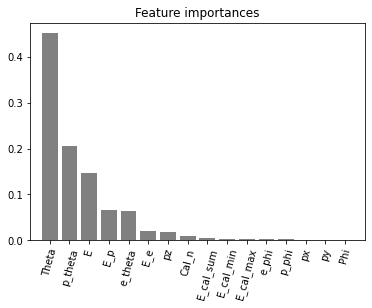

In [57]:
importances = besttree.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure()
plt.title("Feature importances")
plt.bar(range(X20.shape[1]), importances[indices],
        color="gray", align="center")
plt.xticks(range(X20.shape[1]), X20.columns[indices],  rotation=75)
plt.xlim([-1, X20.shape[1]])
plt.show()

In [185]:
for i in range(importances[indices].shape[0]):
    print(X20.columns[indices][i],round(importances[indices][i],3))

Theta 0.451
p_theta 0.205
E 0.147
E_p 0.065
e_theta 0.065
E_e 0.02
pz 0.018
Cal_n 0.009
E_cal_sum 0.005
E_cal_min 0.004
E_cal_max 0.003
e_phi 0.002
p_phi 0.002
px 0.002
py 0.002
Phi 0.002


In [15]:
data_viz = export_graphviz(besttree, out_file='tree.dot', feature_names=X20.columns.to_list(),
                            filled=True, max_depth=3)
graphviz.Source(data_viz, format='png')

In [60]:
besttree_viz = DecisionTreeClassifier(max_depth=5, max_features=15).fit(X20_train, y20_train)

In [ ]:
accuracy_score(y20_test, besttree.predict(X20_test))

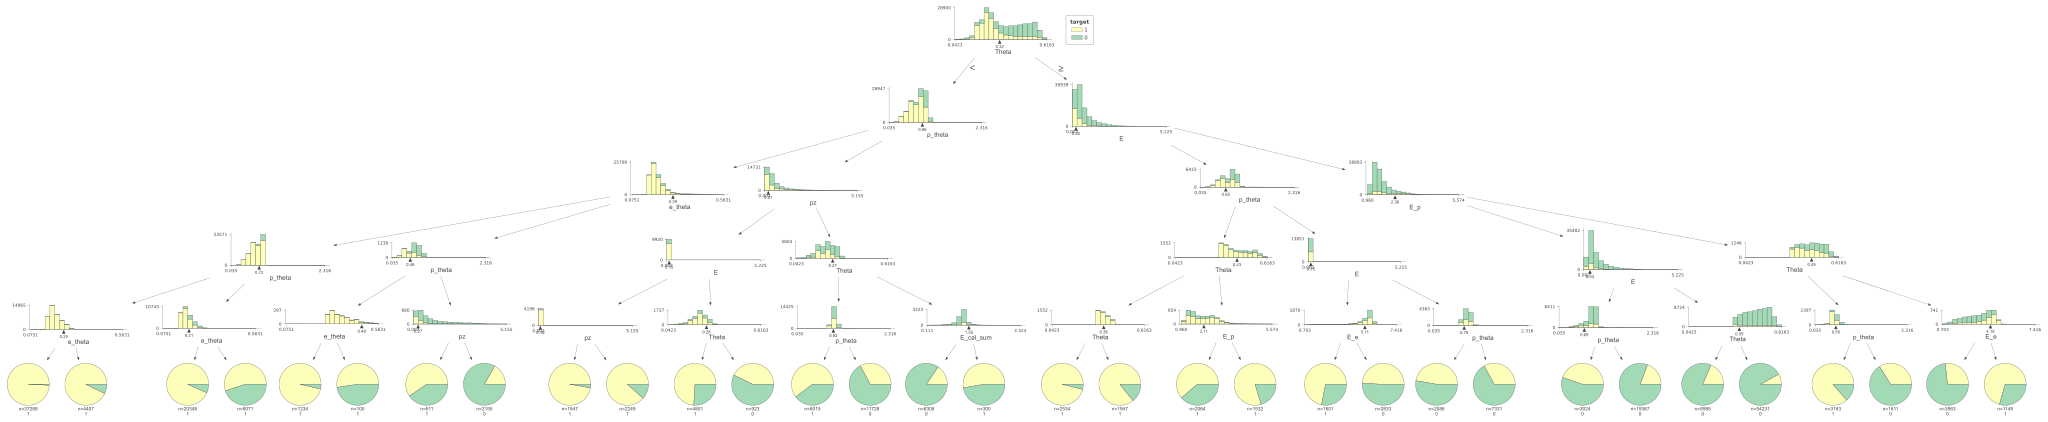

In [61]:
from dtreeviz.trees import dtreeviz 

viz = dtreeviz(besttree_viz, X20, y20,
                target_name="target",
                feature_names=X20.columns.to_list(),
                class_names=list([1,0]))

viz

In [68]:
viz.save('max5.svg')

# Lets test with the real data

In [33]:
data_real = pd.read_csv('result_w_conditions.txt')

In [34]:
data_real

,react_n,px,py,pz,E,Theta,Phi,E_e,e_theta,e_phi,E_p,p_theta,p_phi,E_cal_max,E_cal_min,E_cal_sum,Cal_n
0,28952,-0.048076,0.124020,0.843760,0.854179,0.156356,1.940610,5.39885,0.094898,2.020210,1.12293,1.219890,-1.148020,0.636721,0.094021,1.297290,3.0
1,28952,-0.016302,0.046851,0.507279,0.509699,0.097478,1.905660,5.39885,0.094898,2.020210,1.12293,1.219890,-1.148020,0.636721,0.094021,1.297290,3.0
2,28952,-0.014398,0.035583,0.406506,0.408315,0.094149,1.955290,5.39885,0.094898,2.020210,1.12293,1.219890,-1.148020,0.636721,0.015173,1.312460,4.0
3,28952,-0.009744,0.038167,0.209989,0.213652,0.185431,1.820750,5.39885,0.094898,2.020210,1.12293,1.219890,-1.148020,0.636721,0.015173,1.329610,5.0
4,28952,-0.016668,0.024281,0.206970,0.209055,0.141347,2.172380,5.39885,0.094898,2.020210,1.12293,1.219890,-1.148020,0.636721,0.015173,1.534310,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25257627,320578271,0.034766,0.007226,0.169382,0.173064,0.206648,0.204917,5.29490,0.128938,0.133056,1.32225,0.727706,-2.617860,0.682963,0.252590,1.443990,3.0
25257628,320578274,-0.082344,0.017803,0.231939,0.246766,0.348408,2.928670,1.99982,0.201912,-0.640113,1.34354,0.625476,0.063373,0.467419,0.047464,0.514883,2.0
25257629,320578274,0.031276,-0.041395,0.148598,0.157394,0.335910,-0.923759,1.99982,0.201912,-0.640113,1.34354,0.625476,0.063373,0.467419,0.047464,0.514883,2.0
25257630,320578275,0.087328,-0.112197,1.470030,1.476890,0.096418,-0.909399,3.47011,0.097657,-0.767392,1.29896,0.458074,1.438060,0.523648,0.030080,0.827323,3.0


## lets plot twogammas dist wo classification

In [39]:
only_two = data_real.groupby('react_n').px.count()
only_two_reactions = only_two[(only_two==2)].index.to_list()

In [40]:
data_two_gammas = data_real[data_real.react_n.isin(only_two_reactions)]

In [41]:
data_two_gammas

,react_n,px,py,pz,E,Theta,Phi,E_e,e_theta,e_phi,E_p,p_theta,p_phi,E_cal_max,E_cal_min,E_cal_sum,Cal_n
9,38949,-0.028702,-0.062787,0.556083,0.560352,0.123515,-1.999560,5.30960,0.122371,-1.882110,1.42241,0.473671,1.712270,0.868929,0.046277,1.340910,3.0
10,38949,-0.027533,-0.054211,0.275055,0.281695,0.217555,-2.040740,5.30960,0.122371,-1.882110,1.42241,0.473671,1.712270,0.868929,0.037273,1.479990,6.0
11,72769,-0.047586,0.006940,0.206976,0.212489,0.228293,2.996760,4.60523,0.140510,2.919420,1.15587,0.676737,-0.202398,0.818889,0.056701,1.179610,3.0
12,72769,-0.038053,0.009322,0.192538,0.196484,0.200741,2.901350,4.60523,0.140510,2.919420,1.15587,0.676737,-0.202398,0.818889,0.056701,1.179610,3.0
13,94189,-0.072200,-0.119779,0.603867,0.619851,0.227589,-2.113260,6.17888,0.135315,-1.987440,1.30879,1.083630,1.154930,0.632438,0.231806,1.482580,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25257627,320578271,0.034766,0.007226,0.169382,0.173064,0.206648,0.204917,5.29490,0.128938,0.133056,1.32225,0.727706,-2.617860,0.682963,0.252590,1.443990,3.0
25257628,320578274,-0.082344,0.017803,0.231939,0.246766,0.348408,2.928670,1.99982,0.201912,-0.640113,1.34354,0.625476,0.063373,0.467419,0.047464,0.514883,2.0
25257629,320578274,0.031276,-0.041395,0.148598,0.157394,0.335910,-0.923759,1.99982,0.201912,-0.640113,1.34354,0.625476,0.063373,0.467419,0.047464,0.514883,2.0
25257630,320578275,0.087328,-0.112197,1.470030,1.476890,0.096418,-0.909399,3.47011,0.097657,-0.767392,1.29896,0.458074,1.438060,0.523648,0.030080,0.827323,3.0


In [42]:
data_two_gammas_droped = data_two_gammas.groupby('react_n').sum()[['px','py','pz','E']].reset_index()

In [43]:
data_two_gammas_droped['p^2'] = \
(data_two_gammas_droped.px.apply(lambda x: x**2) + \
 data_two_gammas_droped.py.apply(lambda x: x**2) + \
 data_two_gammas_droped.pz.apply(lambda x: x**2) \
)
data_two_gammas_droped['E^2'] = data_two_gammas_droped.E.apply(lambda x: x**2)

In [44]:
data_two_gammas_droped['inv_mass']=data_two_gammas_droped['E^2'] - data_two_gammas_droped['p^2']
data_two_gammas_droped['inv_mass']=data_two_gammas_droped.inv_mass.apply(lambda x: np.real(x**0.5))

Text(0.5, 1.0, 'Raw data spectrum in 2 gamma reaction')

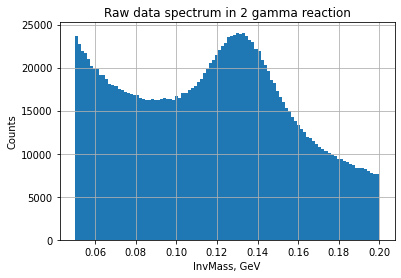

In [52]:
hist_wo = data_two_gammas_droped['inv_mass'][(data_two_gammas_droped['inv_mass']>0.05)&
                                   (data_two_gammas_droped['inv_mass']<0.2)].apply(lambda x:np.real(x)).hist(bins=100)
hist_wo.set_xlabel('InvMass, GeV')
hist_wo.set_ylabel('Сounts')
hist_wo.set_title('Raw data spectrum in 2 gamma reaction')

# after selection

In [17]:
data_real['is_good'] = grid_result.predict(data_real[data_real.columns[1:]])

In [18]:
data_real.is_good.sum()

4403515

In [19]:
tg_react_n = (data_real.groupby('react_n').px.count() == 2)
tg_react_n = tg_react_n[tg_react_n==True]
data_real = data_real[data_real.react_n.isin(tg_react_n.index)]

In [20]:
only_two = data_real.groupby('react_n').is_good.sum()
only_two_reactions = only_two[(only_two==2)].index.to_list()

In [21]:
data_two_gammas = data_real[data_real.react_n.isin(only_two_reactions)]

In [22]:
data_two_gammas.groupby('react_n').px.count().value_counts()

2    372981
Name: px, dtype: int64

In [23]:
data_two_gammas

,react_n,px,py,pz,E,Theta,Phi,E_e,e_theta,e_phi,E_p,p_theta,p_phi,E_cal_max,E_cal_min,E_cal_sum,Cal_n,is_good
66,420271,-0.057159,-0.133817,0.271728,0.308237,0.491652,-1.974480,3.33090,0.147586,-0.146006,1.10785,0.906752,1.860130,0.513339,0.250905,0.764243,2.0,1
67,420271,-0.037700,-0.083493,0.161537,0.185706,0.515889,-1.994920,3.33090,0.147586,-0.146006,1.10785,0.906752,1.860130,0.513339,0.048665,0.899494,4.0,1
100,743038,0.096470,0.492146,1.347320,1.437630,0.356340,1.377230,2.97949,0.180844,-2.655930,1.14415,0.973560,-0.671491,0.565574,0.020394,0.748943,3.0,1
101,743038,0.014429,0.083471,0.391593,0.400650,0.213035,1.399630,2.97949,0.180844,-2.655930,1.14415,0.973560,-0.671491,0.565574,0.020394,0.748943,3.0,1
137,1056845,0.129255,-0.237187,0.548832,0.611703,0.457365,-1.071840,4.41230,0.148662,1.108520,1.26700,0.723845,2.795290,0.760826,0.051452,1.105970,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25257106,320575804,0.177723,-0.046809,0.303258,0.354601,0.544843,-0.257535,5.09933,0.135153,-2.795250,1.06290,0.688744,0.364614,0.784461,0.067551,1.280090,3.0,1
25257445,320577289,-0.065030,-0.080830,0.252187,0.272692,0.390269,-2.248290,2.51266,0.150734,1.013390,1.10713,0.877202,-2.817840,0.352099,0.039692,0.682894,3.0,1
25257446,320577289,0.077346,-0.083861,0.204909,0.234527,0.508013,-0.825795,2.51266,0.150734,1.013390,1.10713,0.877202,-2.817840,0.352099,0.039692,0.682894,3.0,1
25257575,320577951,-0.083699,0.029895,0.159682,0.182750,0.507890,2.798540,4.30701,0.122418,0.191615,1.01147,1.035450,-1.497660,0.700453,0.065149,1.077650,3.0,1


In [24]:
data_two_gammas_droped = data_two_gammas[data_two_gammas.is_good==1]

In [25]:
data_two_gammas_droped

,react_n,px,py,pz,E,Theta,Phi,E_e,e_theta,e_phi,E_p,p_theta,p_phi,E_cal_max,E_cal_min,E_cal_sum,Cal_n,is_good
66,420271,-0.057159,-0.133817,0.271728,0.308237,0.491652,-1.974480,3.33090,0.147586,-0.146006,1.10785,0.906752,1.860130,0.513339,0.250905,0.764243,2.0,1
67,420271,-0.037700,-0.083493,0.161537,0.185706,0.515889,-1.994920,3.33090,0.147586,-0.146006,1.10785,0.906752,1.860130,0.513339,0.048665,0.899494,4.0,1
100,743038,0.096470,0.492146,1.347320,1.437630,0.356340,1.377230,2.97949,0.180844,-2.655930,1.14415,0.973560,-0.671491,0.565574,0.020394,0.748943,3.0,1
101,743038,0.014429,0.083471,0.391593,0.400650,0.213035,1.399630,2.97949,0.180844,-2.655930,1.14415,0.973560,-0.671491,0.565574,0.020394,0.748943,3.0,1
137,1056845,0.129255,-0.237187,0.548832,0.611703,0.457365,-1.071840,4.41230,0.148662,1.108520,1.26700,0.723845,2.795290,0.760826,0.051452,1.105970,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25257106,320575804,0.177723,-0.046809,0.303258,0.354601,0.544843,-0.257535,5.09933,0.135153,-2.795250,1.06290,0.688744,0.364614,0.784461,0.067551,1.280090,3.0,1
25257445,320577289,-0.065030,-0.080830,0.252187,0.272692,0.390269,-2.248290,2.51266,0.150734,1.013390,1.10713,0.877202,-2.817840,0.352099,0.039692,0.682894,3.0,1
25257446,320577289,0.077346,-0.083861,0.204909,0.234527,0.508013,-0.825795,2.51266,0.150734,1.013390,1.10713,0.877202,-2.817840,0.352099,0.039692,0.682894,3.0,1
25257575,320577951,-0.083699,0.029895,0.159682,0.182750,0.507890,2.798540,4.30701,0.122418,0.191615,1.01147,1.035450,-1.497660,0.700453,0.065149,1.077650,3.0,1


In [26]:
data_two_gammas_droped = data_two_gammas_droped.groupby('react_n'). \
                            sum()[['px','py','pz','E']].reset_index()

In [27]:
data_two_gammas_droped['p^2'] = \
(data_two_gammas_droped.px.apply(lambda x: x**2) + \
 data_two_gammas_droped.py.apply(lambda x: x**2) + \
 data_two_gammas_droped.pz.apply(lambda x: x**2) \
)
data_two_gammas_droped['E^2'] = data_two_gammas_droped.E.apply(lambda x: x**2)

In [28]:
data_two_gammas_droped

,react_n,px,py,pz,E,p^2,E^2
0,420271,-0.094859,-0.217310,0.433265,0.493943,0.243941,0.243980
1,743038,0.110899,0.575616,1.738913,1.838280,3.367451,3.379273
2,1056845,0.279186,-0.468397,1.065375,1.197155,1.432364,1.433180
3,2187145,-0.325268,0.306283,1.199616,1.280382,1.638687,1.639378
4,2920259,0.341585,-0.073979,1.410191,1.454871,2.110792,2.116650
...,...,...,...,...,...,...,...
372976,320573631,0.343873,0.203277,0.991745,1.103870,1.143128,1.218529
372977,320575226,-0.822597,-0.038058,1.886173,2.062010,4.235762,4.251885
372978,320575804,0.074057,0.052041,0.630893,0.712179,0.406219,0.507199
372979,320577289,0.012316,-0.164692,0.457096,0.507219,0.236212,0.257271


In [29]:
inv_mass = data_two_gammas_droped['E^2'] - data_two_gammas_droped['p^2']
inv_mass = inv_mass.apply(lambda x:x**0.5)

In [30]:
inv_mass

0         0.006242+0.000000j
1         0.108729+0.000000j
2         0.028559+0.000000j
3         0.026286+0.000000j
4         0.076538+0.000000j
                 ...        
372976    0.274592+0.000000j
372977    0.126976+0.000000j
372978    0.317774+0.000000j
372979    0.145118+0.000000j
372980    0.003999+0.000000j
Length: 372981, dtype: complex128

/Users/andrey.golda/.pyenv/versions/3.9.0/lib/python3.9/site-packages/numpy/lib/histograms.py:851: ComplexWarning: Casting complex values to real discards the imaginary part
  indices = f_indices.astype(np.intp)
/Users/andrey.golda/.pyenv/versions/3.9.0/lib/python3.9/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, 'After model selection')

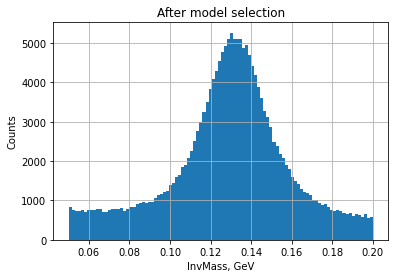

In [53]:
a = inv_mass[(inv_mass>0.05)&(inv_mass<0.2)].hist(bins=100)
a.set_xlabel('InvMass, GeV')
a.set_ylabel('Сounts')
a.set_title('After model selection')

In [38]:
c = inv_mass[(inv_mass>0.05)&(inv_mass<0.2)].apply(lambda x:np.real(x))

/Users/andrey.golda/.pyenv/versions/3.9.0/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/andrey.golda/.pyenv/versions/3.9.0/lib/python3.9/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


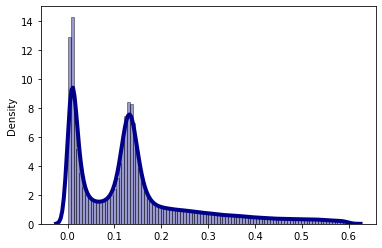

In [41]:
b = sns.distplot(inv_mass[(inv_mass>0.001)&(inv_mass<0.6)], hist=True, kde=True, 
             bins=int(100), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

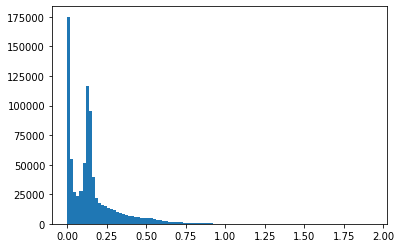

In [42]:
counts, bins, bars = plt.hist(inv_mass[inv_mass>0.0000001].apply(lambda x:np.real(x)), bins = 100)

In [43]:
counts.max()

175153.0